<a href="https://colab.research.google.com/github/alexrafkin/simpsons_facial_recognition/blob/main/SimpsonsFacialRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abstract

In this project I plan to leverage my understanding of both supervised learning and deep learning to build a facial recognition algorithm. After conducting research on convolutional neural networks, I'll build my own CNN which will be able to look at a certain frame from the Simpsons and identify which character is prominently featured. I'll then evaluate my algorithm's success.

#Introduction

Over the course of the coronavirus quarantine, we have all been watching more than our fair share of television. In my case, I have returned to one of America’s most recognizable families - the Simpsons. During its 30+ years fo airtime, they have accumulated thousands of different characters all with distinct features and attributes. After finishing my Deep Learning specialization, I was left wondering if I could build an AI which could identify these characters. Facial recognition has countless uses nowadays - and for many people it is used every time they want to unlock their phone. 

#The Data

In terms of my data source, I have pulled over 20,000 frames from various episodes of The Simpsons, and organized them into folders for 20 of the most prominent characters. I then had to access those images from google colab to resize them to be the same shape, convert them all into arrays which I could work with and save them to a npy file which I could work with later on. I also needed to build out the target data for both training and testing sets. After downloading all of the images, I reformatted them and processed them.

All the images have different dimensions and resolutions - hence the necessity to reformat them.

#Image Processing

This is the code I ran to access the image files and convert each image into an array with dimensions (1, 10000, 3) and collecting them all in a file with all the image data. This is the pixel data of the images which simplified the process of downloading. I ran this in a separate notebook since it takes a very long time and I wanted to keep things organized.

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')

import PIL
from PIL import Image
import glob
import numpy as np
from numpy import asarray

import os
os.chdir("drive/My Drive/Thinkful/Simpsons")

X_train = []
Y_train = []
X_test = []
Y_test = []

for folderpath in glob.iglob('/content/drive/MyDrive/Thinkful/Simpsons/simpsons_testset/*', recursive=True): #This accesses each folder in my drive - each folder has a bunch of photos of a certain character
  #print(folderpath)
  for filepath in glob.iglob(folderpath + '/*.jpg'): #this iterates through each image in the folder
    split = filepath.split('/')
    character = split[7]
    #print(character)
    #print(filepath)

    # load the image
    image = Image.open(filepath)
    # resize the image to be the same as all the other images
    image = image.resize((100,100))
    # convert image to numpy array
    data = asarray(image)
    # summarize shape
    data = np.reshape(data,(1,10000,3))[0]

    X_test.append(data) # this is all the image data
    Y_test.append(character) # this is the target data - all the names of the characters
  print(character)

for folderpath in glob.iglob('/content/drive/MyDrive/Thinkful/Simpsons/simpsons_trainingset/*', recursive=True):
  #print(folderpath)
  for filepath in glob.iglob(folderpath + '/*.jpg'):
    split = filepath.split('/')
    character = split[7]
    #print(character)
    #print(filepath)

    # load the image
    image = Image.open(filepath)
    # resize the image to be the same as all the other images
    image = image.resize((100,100))
    # convert image to numpy array
    data = asarray(image)
    # summarize shape
    data = np.reshape(data,(1,10000,3))[0]

    X_train.append(data)
    Y_train.append(character)
  print(character)

X_train = X_train.reshape(X_train.shape[0],100,100,3)
X_test = X_test.reshape(X_test.shape[0],100,100,3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#Reshaping the data to be 100x100x3 format - this is what we will feed into the CNN model. We are also normalizing the RGB values to be between 0 and 1 instead of 0 and 255.

characters = {'abraham_grampa_simpson' : 0, 'apu_nahasapeemapetilon' : 1, 'bart_simpson' : 2, 
        'charles_montgomery_burns' : 3, 'chief_wiggum' : 4, 'comic_book_guy' : 5, 'edna_krabappel' : 6, 
        'homer_simpson' : 7, 'kent_brockman' : 8, 'krusty_the_clown' : 9, 'lenny_leonard' : 10, 'lisa_simpson' : 11, 
        'marge_simpson' : 12, 'mayor_quimby' : 13, 'milhouse_van_houten' : 14, 'moe_szyslak' : 15, 
        'ned_flanders' : 16, 'nelson_muntz' : 17, 'principal_skinner' : 18, 'sideshow_bob' : 19}
        
characters_r = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lenny_leonard', 11: 'lisa_simpson', 
        12: 'marge_simpson', 13: 'mayor_quimby', 14: 'milhouse_van_houten', 15: 'moe_szyslak', 
        16: 'ned_flanders', 17: 'nelson_muntz', 18: 'principal_skinner', 19: 'sideshow_bob'}
        
#Building two dictionaries we will use to reference the characters and their associated indicies.

Y_test = np.array(characters[Y_test_str[0]])
Y_train = np.array(characters[Y_train_str[0]])

for i in Y_test_str[1:]:
  Y_test = np.append(Y_test, characters[i])
  
for i in Y_train_str[1:]:
  Y_train = np.append(Y_train, characters[i])
  
#Since our Y values are in string format, we needed to reformat them to be integer values, and we will soon have to turn them into dummy variables to feed into the CNN.

X = np.concatenate((X_train, X_test))
Y = np.concatenate((Y_train, Y_test))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=942) #The pre-built test/train sets were faulty - we need to randomly sample from the complete set.

np.save('x_train_FINAL.npy', x_train) # saving the X_train array to the drive
np.save('y_train_FINAL.npy', y_train) # saving the Y_train array to the drive
np.save('x_test_FINAL.npy', x_test) # saving the X_train array to the drive
np.save('y_test_FINAL.npy', y_test) # saving the Y_train array to the drive
'''

'from google.colab import drive\ndrive.mount(\'/content/drive\')\n\nimport PIL\nfrom PIL import Image\nimport glob\nimport numpy as np\nfrom numpy import asarray\n\nimport os\nos.chdir("drive/My Drive/Thinkful/Simpsons")\n\nX_train = []\nY_train = []\nX_test = []\nY_test = []\n\nfor folderpath in glob.iglob(\'/content/drive/MyDrive/Thinkful/Simpsons/simpsons_testset/*\', recursive=True): #This accesses each folder in my drive - each folder has a bunch of photos of a certain character\n  #print(folderpath)\n  for filepath in glob.iglob(folderpath + \'/*.jpg\'): #this iterates through each image in the folder\n    split = filepath.split(\'/\')\n    character = split[7]\n    #print(character)\n    #print(filepath)\n\n    # load the image\n    image = Image.open(filepath)\n    # resize the image to be the same as all the other images\n    image = image.resize((100,100))\n    # convert image to numpy array\n    data = asarray(image)\n    # summarize shape\n    data = np.reshape(data,(1,1000

#Imports and Accessing the Data

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from keras.layers import Activation, Dense, Conv2D , MaxPool2D , Flatten , Dropout, MaxPooling2D 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import seaborn as sns
import matplotlib.patches as mpatches

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/My Drive/Thinkful/Simpsons")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Accessing the arrays I built from the initial image files. This data is already stored in my drive.

In [ ]:
X_test = np.load('x_test_FINAL.npy')
Y_test = np.load('y_test_FINAL.npy')

In [ ]:
X_train = np.load('x_train_FINAL.npy')
Y_train = np.load('y_train_FINAL.npy')

In [ ]:
characters = {'abraham_grampa_simpson' : 0, 'apu_nahasapeemapetilon' : 1, 'bart_simpson' : 2, 
        'charles_montgomery_burns' : 3, 'chief_wiggum' : 4, 'comic_book_guy' : 5, 'edna_krabappel' : 6, 
        'homer_simpson' : 7, 'kent_brockman' : 8, 'krusty_the_clown' : 9, 'lenny_leonard' : 10, 'lisa_simpson' : 11, 
        'marge_simpson' : 12, 'mayor_quimby' : 13, 'milhouse_van_houten' : 14, 'moe_szyslak' : 15, 
        'ned_flanders' : 16, 'nelson_muntz' : 17, 'principal_skinner' : 18, 'sideshow_bob' : 19}

In [ ]:
characters_r = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lenny_leonard', 11: 'lisa_simpson', 
        12: 'marge_simpson', 13: 'mayor_quimby', 14: 'milhouse_van_houten', 15: 'moe_szyslak', 
        16: 'ned_flanders', 17: 'nelson_muntz', 18: 'principal_skinner', 19: 'sideshow_bob'}

Building two dictionaries we will use to reference the characters and their associated indicies.

#Looking at the Data

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(18493, 100, 100, 3)
(18493,)
(2055, 100, 100, 3)
(2055,)


Image Label: moe_szyslak


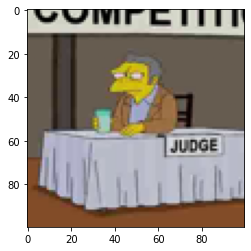

In [ ]:
plt.imshow(X_train[7842])
print('Image Label: {}'.format(characters_r[Y_train[7842]]))

Here is an example of what one of our images looks like.

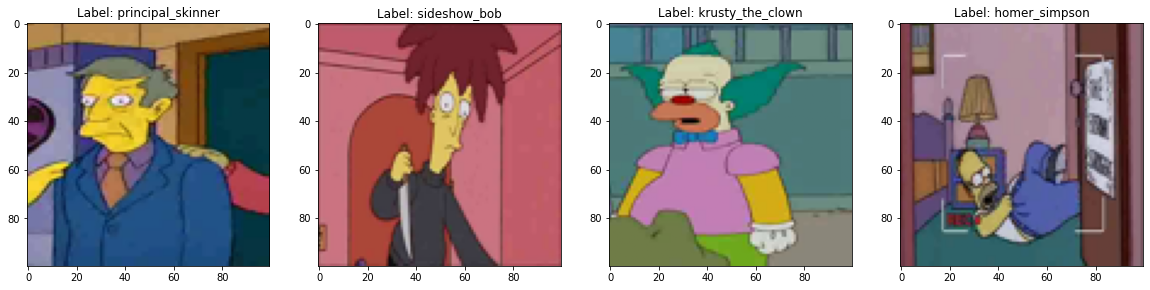

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[120])
plt.title("Label: {}".format(characters_r[Y_train[120]]))

plt.subplot(142)
plt.imshow(X_train[11125])
plt.title("Label: {}".format(characters_r[Y_train[11125]]))

plt.subplot(143)
plt.imshow(X_train[3845])
plt.title("Label: {}".format(characters_r[Y_train[3845]]))

plt.subplot(144)
plt.imshow(X_train[18225])
plt.title("Label: {}".format(characters_r[Y_train[18225]]))

plt.show()

Here are some other characters and images.

In [ ]:
Y_train = to_categorical(Y_train, 20)
Y_test = to_categorical(Y_test, 20)

Now we have created our dummy variables.

In [ ]:
list20=[]
for i in range(20):
  list20.append(i)

In [ ]:
train_counts = pd.DataFrame(Y_train, columns = list20)
test_counts = pd.DataFrame(Y_test, columns = list20)

for i in list20:
  print('{} has {} training images and {} testing images. Train to test ratio of around {}:1'.format(characters_r[i], int(round(train_counts.mean()[i]*train_counts.count()[0],0)),int(round(test_counts.mean()[i]*test_counts.count()[0],0)),round((train_counts.mean()[i]*train_counts.count()[0])/(test_counts.mean()[i]*test_counts.count()[0]),1)))

abraham_grampa_simpson has 862 training images and 101 testing images. Train to test ratio of around 8.5:1
apu_nahasapeemapetilon has 600 training images and 73 testing images. Train to test ratio of around 8.2:1
bart_simpson has 1236 training images and 156 testing images. Train to test ratio of around 7.9:1
charles_montgomery_burns has 1142 training images and 101 testing images. Train to test ratio of around 11.3:1
chief_wiggum has 926 training images and 110 testing images. Train to test ratio of around 8.4:1
comic_book_guy has 464 training images and 55 testing images. Train to test ratio of around 8.4:1
edna_krabappel has 458 training images and 49 testing images. Train to test ratio of around 9.3:1
homer_simpson has 2063 training images and 233 testing images. Train to test ratio of around 8.9:1
kent_brockman has 501 training images and 47 testing images. Train to test ratio of around 10.7:1
krusty_the_clown has 1118 training images and 138 testing images. Train to test ratio of

This is the breakdown of our characters and their training/testing ratios.

In [ ]:
total_counts = pd.DataFrame()
for i in range(20):
  total_counts.loc[i,'name'] = characters_r[i]
total_counts['train'] = train_counts.sum()
total_counts['test'] = test_counts.sum()
total_counts['total'] = total_counts['train'] + total_counts['test']

In [ ]:
total_counts['train:test'] = total_counts['train']/total_counts['test']
total_counts

,name,train,test,total,train:test
0,abraham_grampa_simpson,862.0,101.0,963.0,8.534654
1,apu_nahasapeemapetilon,600.0,73.0,673.0,8.219178
2,bart_simpson,1236.0,156.0,1392.0,7.923077
3,charles_montgomery_burns,1142.0,101.0,1243.0,11.306931
4,chief_wiggum,926.0,110.0,1036.0,8.418181
5,comic_book_guy,464.0,55.0,519.0,8.436363
6,edna_krabappel,458.0,49.0,507.0,9.346939
7,homer_simpson,2063.0,233.0,2296.0,8.854077
8,kent_brockman,501.0,47.0,548.0,10.659575
9,krusty_the_clown,1118.0,138.0,1256.0,8.101449


In [ ]:
for i in [1,2]:
  print(total_counts.sum()[i])

18493.0
2055.0


In [ ]:
total_counts.sum()[1]/total_counts.sum()[2]

8.999026

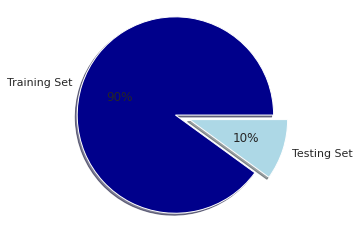

In [ ]:
explode = (0, 0.15)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['darkblue', 'lightblue']
fig1, ax1 = plt.subplots()
ax1.pie([total_counts.sum()[1],total_counts.sum()[2]], explode=explode, colors=colors, labels=['Training Set','Testing Set'], autopct='%1.0f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

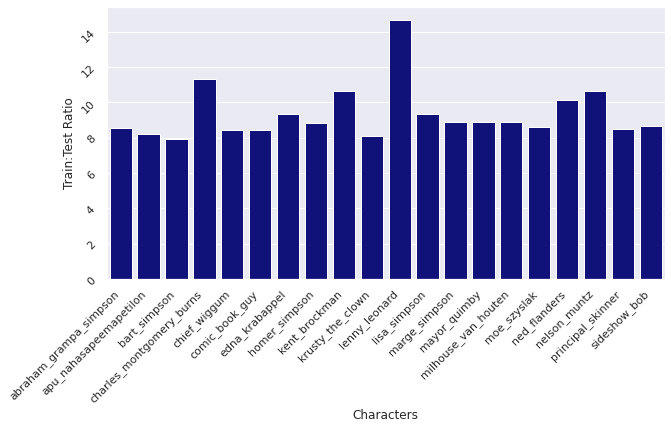

In [ ]:
# set the figure size
plt.figure(figsize=(10, 5))

train = sns.barplot(x="name",  y="train:test", data=total_counts, color='darkblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Train:Test Ratio')

plt.xlabel("Characters")
plt.ylabel("Train:Test Ratio")

plt.xticks(tick_marks, rotation=45, horizontalalignment='right')

plt.yticks(rotation=45, horizontalalignment='right')

# show the graph
plt.show()

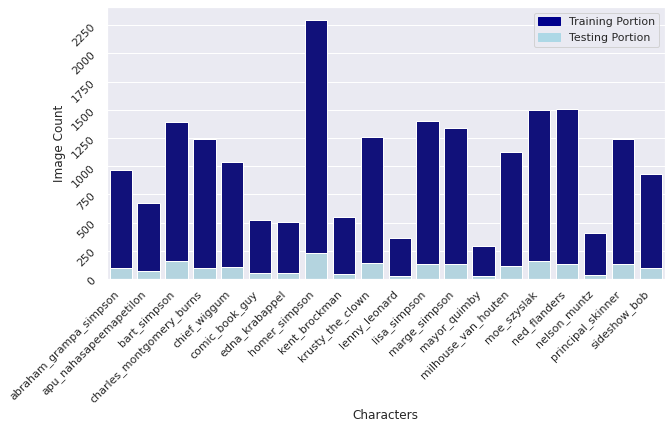

In [ ]:
# set the figure size
plt.figure(figsize=(10, 5))

train = sns.barplot(x="name",  y="total", data=total_counts, color='darkblue')
test = sns.barplot(x="name",  y="test", data=total_counts, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Training Portion')
bottom_bar = mpatches.Patch(color='lightblue', label='Testing Portion')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Characters")
plt.ylabel("Image Count")

plt.xticks(tick_marks, rotation=45, horizontalalignment='right')

plt.yticks(ticks = np.arange(0, 2500, step=250),rotation=45, horizontalalignment='right')

# show the graph
plt.show()

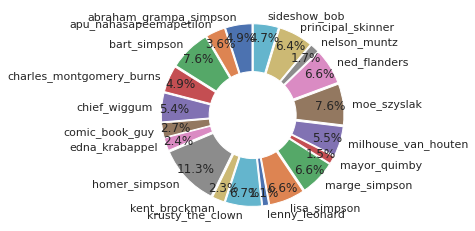

In [ ]:
import matplotlib.pyplot as plt

#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
 
plt.pie(total_counts['test'], labels=total_counts['name'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#Assessing Potential Sources of Bias

Some images have other characters in them, some characters have fewer images, Varying train/test images

#Evaluating Model Success

I will be using Accuracy, Precision, Recall and F-1 Scores in order to evaluate my final model.

#Building Our Convolutional Neural Network

In [ ]:
#test_acc = []
#train_acc = []

This is the final architecture of our Convolutional Neural Network

In [ ]:
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(100, 100, 3)))

# convolutional, pooling, and dropout layers
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# flatten output of conv
model.add(Flatten())

# hidden layer - Fully Connected
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4)) # Dropout layers prevent overfitting
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(20, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history = model.fit(X_train, Y_train, batch_size=128, epochs=25, validation_data=(X_test,Y_test))

Epoch 1/25
145/145 [==============================] - 63s 190ms/step - loss: 2.9917 - accuracy: 0.1119 - val_loss: 2.4198 - val_accuracy: 0.2720
Epoch 2/25
145/145 [==============================] - 26s 177ms/step - loss: 2.2871 - accuracy: 0.3081 - val_loss: 1.7286 - val_accuracy: 0.5085
Epoch 3/25
145/145 [==============================] - 26s 179ms/step - loss: 1.7167 - accuracy: 0.4950 - val_loss: 1.2370 - val_accuracy: 0.6316
Epoch 4/25
145/145 [==============================] - 26s 180ms/step - loss: 1.3025 - accuracy: 0.6074 - val_loss: 1.0649 - val_accuracy: 0.6891
Epoch 5/25
145/145 [==============================] - 26s 181ms/step - loss: 1.0525 - accuracy: 0.6853 - val_loss: 0.9089 - val_accuracy: 0.7358
Epoch 6/25
145/145 [==============================] - 26s 182ms/step - loss: 0.8350 - accuracy: 0.7473 - val_loss: 0.8176 - val_accuracy: 0.7606
Epoch 7/25
145/145 [==============================] - 26s 183ms/step - loss: 0.6962 - accuracy: 0.7870 - val_loss: 0.7098 - val_ac

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 50)      1400      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 75)      33825     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 75)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 125)       84500     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 125)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 125)       0

#Evaluating Model Succes

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
print('Train Accuracy:',train_score[1])
print('Test Accuracy:', score[1])

Train Accuracy: 0.9995133280754089
Test Accuracy: 0.8462287187576294


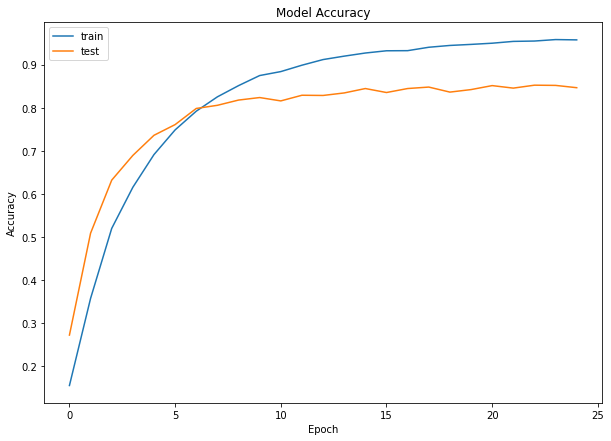

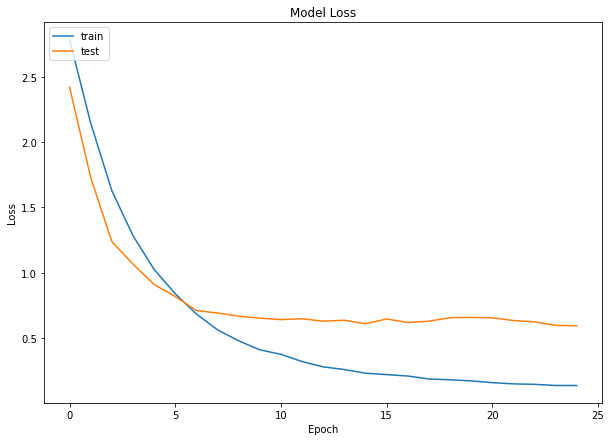

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
import sklearn
from sklearn import metrics
y_pred = model.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(Y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(characters_r.values())), sep='')


                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.85      0.85      0.85       101
  apu_nahasapeemapetilon       0.85      0.93      0.89        73
            bart_simpson       0.79      0.75      0.77       156
charles_montgomery_burns       0.74      0.83      0.79       101
            chief_wiggum       0.91      0.85      0.88       110
          comic_book_guy       0.96      0.80      0.87        55
          edna_krabappel       0.85      0.92      0.88        49
           homer_simpson       0.80      0.83      0.82       233
           kent_brockman       0.84      0.98      0.90        47
        krusty_the_clown       0.93      0.92      0.93       138
           lenny_leonard       0.68      0.83      0.75        23
            lisa_simpson       0.78      0.75      0.76       136
           marge_simpson       0.93      0.93      0.93       136
            mayor_quimby       0.95      0.70      0.81        30
     mil

In [ ]:
plt.figure(figsize=(8,8))
cnf_matrix = sklearn.metrics.confusion_matrix(np.argmax(y_pred, axis=1), np.where(Y_test > 0)[1])
classes = list(characters_r.values())

<Figure size 576x576 with 0 Axes>

In [ ]:
# Creating 2-D Numpy array
n_arr = cnf_matrix

#print("Given 2-D Array:")
#print(n_arr)
  
# Vector element 
vec = np.asarray(test_counts.sum())
#print("\nVector element:")
#print(vec)
  
Result_arr = n_arr / vec[:,None]
# Dividing rows of 2-D array with vector element
#print("\nResultant Array")
#print(n_arr / vec[:,None])

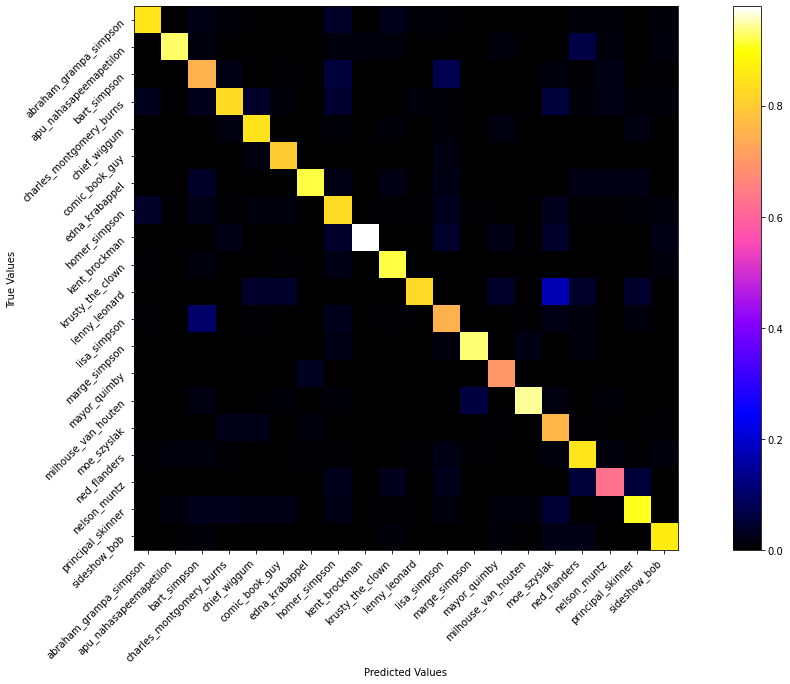

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(Result_arr, interpolation='nearest',cmap='gnuplot2')
plt.colorbar()
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=45, 
               horizontalalignment='right')
_ = plt.yticks(tick_marks, classes, rotation = 45)

This show us the breakdown of how images were identified - we can see the strong correlation down the middle of properly identified characters, and a few spots where characters were misidentified.

#What Have I Accomplished?

* Processed thousands of images in order to prepare them for CNN, solving lots of RAM issues along the way.
* Gained a better understanding of Python Imaging Libraries.
* Conducted research on Convolutional Neural Networks, building off of my knowledge of Deep Learning and Artificial Neural Networks.
* Developed my own Convolutional Neural Network which identifies Simpsons Characters — and can be expanded for other image recognition/classification problems.


#What Value Does this Bring?

#Future Work

* Address the overfitting issue with image augmentation using ImageDataGenerator.
 * Augments each image within the training process so that the CNN never sees the same image twice. This helps the CNN develop a more nuanced understanding of the patterns present in recurring faces.
* Identify multiple characters at a time.
  * Possibly create a relationship web based on who shows up together most frequently.
* Run facial recognition on clips of the show and have live output of who is present in each frame.
